In [1]:
pip install textblob

In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 204.8 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/300.2 kB 261.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 261.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 261.7 kB/s eta 0:00:

In [1]:
# import libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load csv file

df = pd.read_csv(r'C:\Users\USER\Documents\COURSES\Flit Apprenticeship\Projects\3\Amazon Product Review.csv')

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,8/31/2015,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,8/31/2015,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,8/31/2015,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,8/31/2015,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,8/31/2015,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [5]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [6]:
text_df = df.drop(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
     'review_date'], axis=1)
text_df.head()

,review_headline,review_body,sentiment
0,Five Stars,Great love it,1
1,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,0
2,Well thought out device,Excellent unit. The versatility of this table...,1
3,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,1
4,Five Stars,All Amazon products continue to meet my expect...,1


In [7]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_headline  30844 non-null  object
 1   review_body      30842 non-null  object
 2   sentiment        30846 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 723.1+ KB


In [8]:
def preprocess_text(text):
    if pd.isnull(text):  # Check if the text is NaN
        return ''  # Return an empty string if the text is missing
    text = str(text) # Convert the text to string to handle non-string values
    text = text.lower()
    text_clean = re.sub(r"(<[^>]+>(?:\s+|\n|\r)*)", " ", text, flags=re.MULTILINE) # Remove HTML tags
    text_tokenize = word_tokenize(text_clean)
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text_tokenize if word not in stop_words]
    return " ".join(filtered_text)

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
df['preprocessed_review_body'] = df['review_body'].apply(preprocess_text)

In [10]:
# Drop duplicates based on preprocessed review bodies
df.drop_duplicates(subset=['preprocessed_review_body'], inplace=True)

In [11]:
# Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return text

In [12]:
# Apply stem to the data
df['stemmed_review_body'] = df['preprocessed_review_body'].apply(lambda x: stemming(x))

In [13]:
df['preprocessed_review_body'].head()

0                                           great love
1    lots ads slow processing speed occasionally sh...
2    excellent unit . versatility tablet , besides ...
3    bought amazon prime ended buying 16gb one $ 95...
4           amazon products continue meet expectations
Name: preprocessed_review_body, dtype: object

In [15]:
df['preprocessed_review_body'].info()

<class 'pandas.core.series.Series'>
Index: 26740 entries, 0 to 30845
Series name: preprocessed_review_body
Non-Null Count  Dtype 
--------------  ----- 
26740 non-null  object
dtypes: object(1)
memory usage: 417.8+ KB


In [17]:
# Text Vectorization
vectorizer = CountVectorizer(max_features = 1000)
data = vectorizer.fit_transform(df['preprocessed_review_body'])

In [19]:
df['sentiment'].value_counts()

sentiment
1    21741
0     4999
Name: count, dtype: int64

In [22]:
# Sentiment labelling
sentiment_mapping = {
    0: "Negative",
    1: "Positive"
}

def label_sentiment(sentiment_value):
    return sentiment_mapping[sentiment_value]

In [25]:
df['sentiment_label'] = df['sentiment'].apply(label_sentiment)

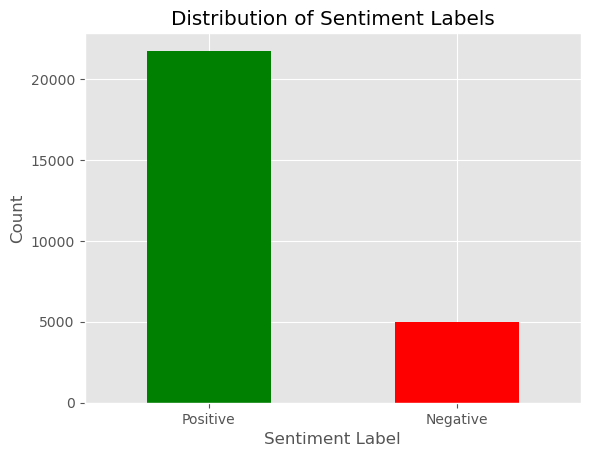

In [33]:
# Plotting a Bar Chart
sentiment_count = df['sentiment_label'].value_counts()

sentiment_count.plot(kind = 'bar', color = ['green', 'red'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=0)
plt.show()

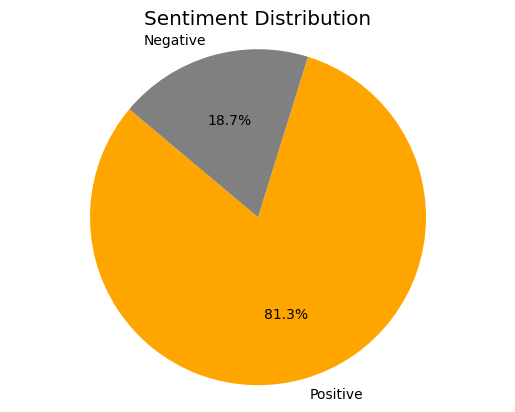

In [43]:
# A Pie Chart
colors = ['orange', 'gray']
plt.pie(sentiment_count, labels = sentiment_count.index, autopct = '%1.1f%%', startangle = 140, colors = colors)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Model Building & Evaluation

X_train, X_test, Y_train, Y_test = train_test_split(data, df['sentiment_label'], test_size = 0.2, random_state = 42) # split data  

model = LogisticRegression()
model.fit(X_train, Y_train) # train the data on a logistic regression model

model_pred = model.predict(X_test)
model_accuracy = model.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(model_accuracy*100))

Accuracy: 88.86%




              precision    recall  f1-score   support

    Negative       0.76      0.58      0.66       998
    Positive       0.91      0.96      0.93      4350

    accuracy                           0.89      5348
   macro avg       0.84      0.77      0.80      5348
weighted avg       0.88      0.89      0.88      5348



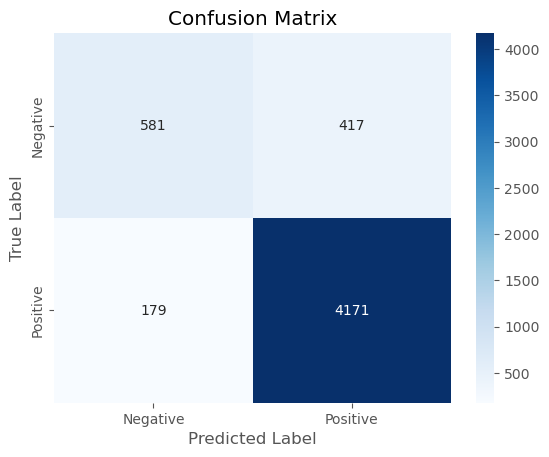

In [53]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, model_pred)
print("\n")
print(classification_report(Y_test, model_pred))

sns.heatmap(conf_matrix, annot = True,  fmt = 'd', cmap = 'Blues', 
           xticklabels = ['Negative', 'Positive'],
           yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Hyperparameter tuning using GridSearch
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [58]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [61]:
Y_pred = grid.predict(X_test)

In [63]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 88.86%
